### What are the main characteristics that have the most impact on the car price?


## **1. Import Data**


In [12]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
path = "https://raw.githubusercontent.com/andresmorenoviteri/data_analysis/main/CarPrice_Assignment.csv"
df = pd.read_csv(path)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## **2. Analyzing Individual Feature Patterns Using Visualization**


In [14]:
# list the data types for each column
print(df.dtypes)

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


Calculate correlations between all features of type "int64" or "float64" using the method "corr":


In [15]:
df.corr(numeric_only=True)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


Find the correlation between the following columns: boreratio, stroke, compressionratio, and horsepower.

Hint: if you would like to select those columns, use the following syntax: df[['boreratio','stroke','compressionratio','horsepower']]



In [17]:
# Write your code below and press Shift+Enter to execute
df[['boreratio','stroke','compressionratio','horsepower']].corr()


,boreratio,stroke,compressionratio,horsepower
boreratio,1.000000,-0.055909,0.005197,0.573677
stroke,-0.055909,1.000000,0.186110,0.080940
compressionratio,0.005197,0.186110,1.000000,-0.204326
horsepower,0.573677,0.080940,-0.204326,1.000000


 Let's see several examples of different linear relationships:


<h3>Positive Linear Relationship</h4>


Let's find the scatterplot of "enginesize" and "price".


(0.0, 53383.22371826088)

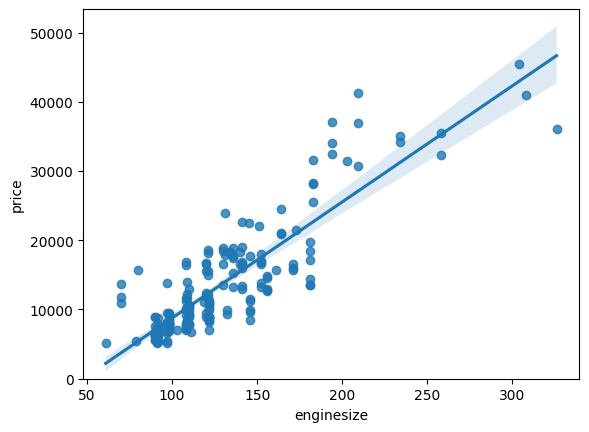

In [18]:
# Engine size as potential predictor variable of price
sns.regplot(x="enginesize", y="price", data=df)
plt.ylim(0,)

As the enginesize goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.


 We can examine the correlation between 'enginesize' and 'price' and see that it's approximately 0.87.


In [20]:
df[["enginesize", "price"]].corr()

,enginesize,price
enginesize,1.000000,0.874145
price,0.874145,1.000000


Highway mpg is a potential predictor variable of price. Let's find the scatterplot of "highwaympg" and "price".


<Axes: xlabel='highwaympg', ylabel='price'>

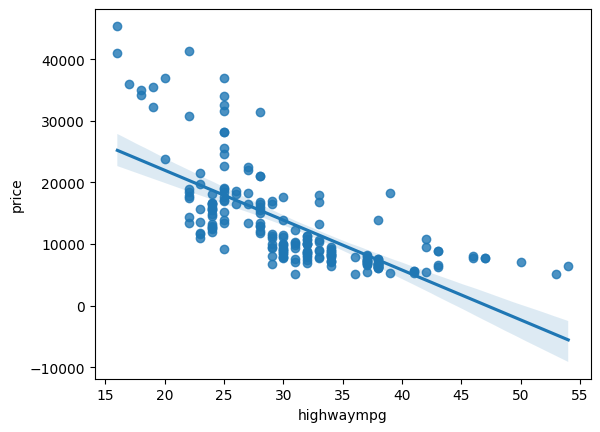

In [21]:
sns.regplot(x="highwaympg", y="price", data=df)

As highwaympg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.


We can examine the correlation between 'highwaympg' and 'price' and see it's approximately -0.704.


In [22]:
df[['highwaympg', 'price']].corr()

,highwaympg,price
highwaympg,1.000000,-0.697599
price,-0.697599,1.000000


<h3>Weak Linear Relationship</h3>


Let's see if "peakrpm" is a predictor variable of "price".


<Axes: xlabel='peakrpm', ylabel='price'>

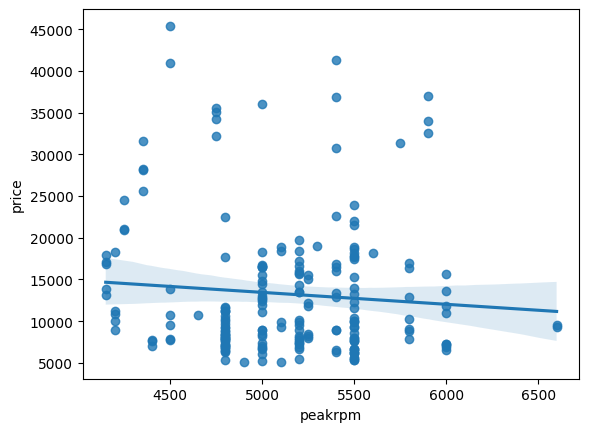

In [23]:
sns.regplot(x="peakrpm", y="price", data=df)

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.

In [24]:
df[['peakrpm','price']].corr()

,peakrpm,price
peakrpm,1.000000,-0.085267
price,-0.085267,1.000000


We can examine the correlation between 'peakrpm' and 'price' and see it's approximately -0.085.

Find the correlation  between x="stroke" and y="price".

Hint: if you would like to select those columns, use the following syntax: df[["stroke","price"]].

In [25]:
# Write your code below and press Shift+Enter to execute
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.000000,0.079443
price,0.079443,1.000000


Given the correlation results between "price" and "stroke", do you expect a linear relationship?

Verify your results using the function "regplot()".



[]

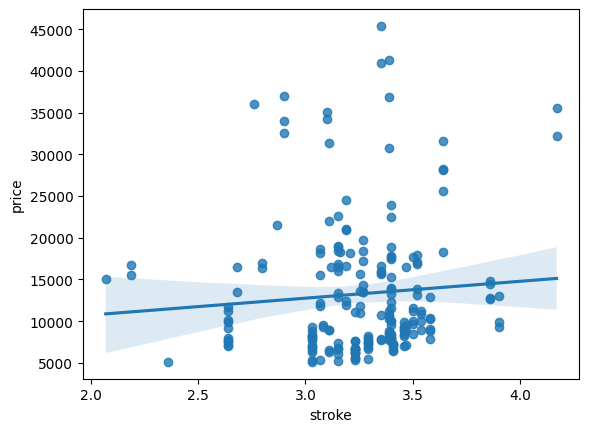

In [ ]:
# Write your code below and press Shift+Enter to execute
sns.regplot(data=df, x='stroke', y='price')
plt.plot()

Let's look at the relationship between "carbody" and "price".

<Axes: xlabel='carbody', ylabel='price'>

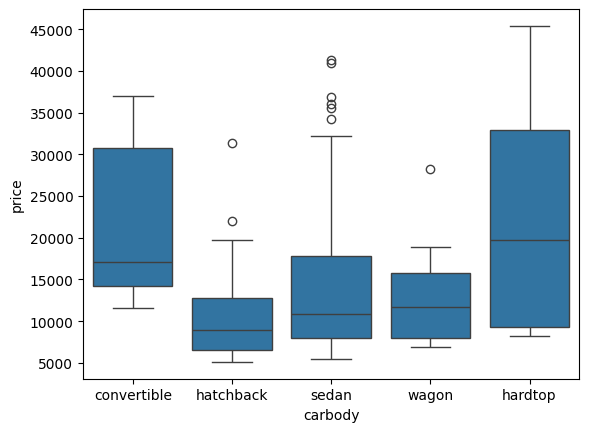

In [32]:
sns.boxplot(x="carbody", y="price", data=df)

We see that the distributions of price between the different carbody categories have a significant overlap, so carbody would not be a good predictor of price. Let's examine engine "enginelocation" and "price":

<Axes: xlabel='enginelocation', ylabel='price'>

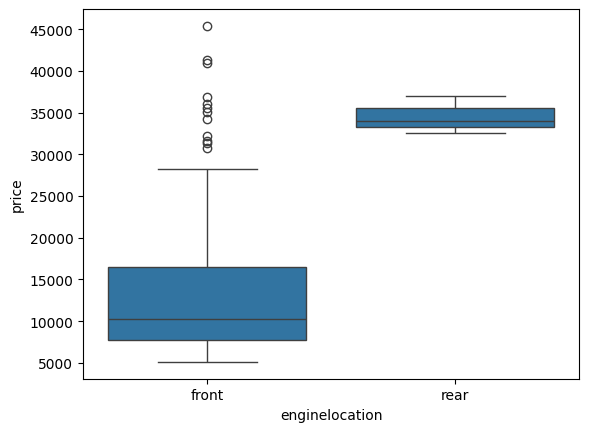

In [33]:
sns.boxplot(x="enginelocation", y="price", data=df)

Here we see that the distribution of price between these two enginelocation categories, front and rear, are distinct enough to take enginelocation as a potential good predictor of price.


 Let's examine "drivewheel" and "price".


<Axes: xlabel='drivewheel', ylabel='price'>

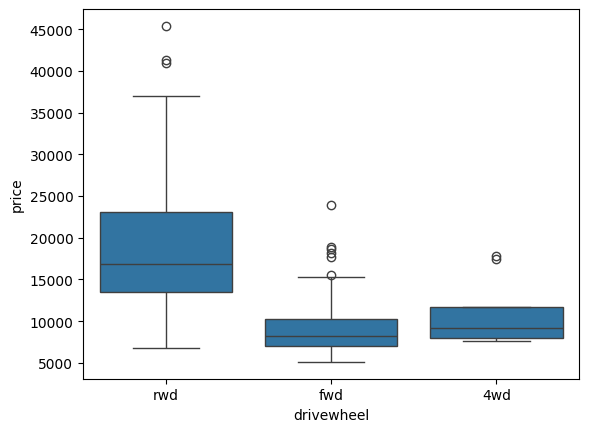

In [34]:
# drivewheel
sns.boxplot(x="drivewheel", y="price", data=df)

Here we see that the distribution of price between the different drive-wheel categories differs. As such, drivewheel could potentially be a predictor of price.


## **3. Descriptive Statistical Analysis**

<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li>
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


 We can apply the method "describe" as follows:


In [35]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


 The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:


In [36]:
df.describe(include=['object'])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,peugeot 504,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


<h3>Value Counts</h3>


Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drivewheel". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket df['drivewheel'], not two brackets df[['drivewheel']]


In [37]:
df['drivewheel'].value_counts()

,count
drivewheel,
fwd,120
rwd,76
4wd,9


We can convert the series to a dataframe as follows:


In [38]:
df['drivewheel'].value_counts().to_frame()

,count
drivewheel,
fwd,120
rwd,76
4wd,9


Let's repeat the above steps but save the results to the dataframe "drivewheel_counts" and rename the column  'drivewheel' to 'value_counts'.


In [39]:
drivewheel_counts = df['drivewheel'].value_counts().to_frame()
drivewheel_counts.rename(columns={'drivewheel': 'value_counts'}, inplace=True)
drivewheel_counts

,count
drivewheel,
fwd,120
rwd,76
4wd,9


 Now let's rename the index to 'drivewheel':


In [40]:
drivewheel_counts.index.name = 'drivewheel'
drivewheel_counts

,count
drivewheel,
fwd,120
rwd,76
4wd,9


We can repeat the above process for the variable 'enginelocation'.


In [41]:
# engine-location as variable
engine_loc_counts = df['enginelocation'].value_counts().to_frame()
engine_loc_counts.rename(columns={'enginelocation': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'enginelocation'
engine_loc_counts.head(10)

,count
enginelocation,
front,202
rear,3


After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 202 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

## **4. Basics of Grouping**

The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

For example, let's group by the variable "drivewheel". We see that there are 3 different categories of drivewheel.


In [42]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know, on average, which type of drive wheel is most valuable, we can group "drivewheel" and then average them.

We can select the columns 'drivewheel' and 'price', then assign it to the variable "df_group_one".


In [51]:
df_group_one = df[['drivewheel', 'price']]

We can then calculate the average price for each of the different categories of data.


In [52]:
# grouping results
df_group_one = df_group_one.groupby(['drivewheel'],as_index=False).mean()
df_group_one

,drivewheel,price
0,4wd,11087.463000
1,fwd,9239.308333
2,rwd,19910.809211


From our data, it seems rearwheel drive vehicles are, on average, the most expensive, while 4-wheel and frontwheel are approximately the same in price.

You can also group by multiple variables. For example, let's group by both 'drivewheel' and 'carbody'. This groups the dataframe by the unique combination of 'drivewheel' and 'carbody'. We can store the results in the variable 'grouped_test1'.


In [53]:
# grouping results
df_gptest = df[['drivewheel','carbody','price']]
grouped_test1 = df_gptest.groupby(['drivewheel','carbody'],as_index=False).mean()
grouped_test1

,drivewheel,carbody,price
0,4wd,hatchback,12731.083500
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9780.385965
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.

In this case, we will leave the drivewheel variable as the rows of the table, and pivot carbody to become the columns of the table:


In [56]:
grouped_pivot = grouped_test1.pivot(index='drivewheel',columns='carbody')
grouped_pivot

price                                                        
carbody    convertible       hardtop     hatchback         sedan         wagon
drivewheel                                                                    
4wd                NaN           NaN  12731.083500  12647.333333   9095.750000
fwd            11595.0   8249.000000   8396.387755   9780.385965   9997.333333
rwd            23949.6  24202.714286  15235.815789  21711.833333  16994.222222

Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well.


In [57]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                                        
carbody    convertible       hardtop     hatchback         sedan         wagon
drivewheel                                                                    
4wd                0.0      0.000000  12731.083500  12647.333333   9095.750000
fwd            11595.0   8249.000000   8396.387755   9780.385965   9997.333333
rwd            23949.6  24202.714286  15235.815789  21711.833333  16994.222222

Use the "groupby" function to find the average "price" of each car based on "carbody".

In [59]:
# Write your code below and press Shift+Enter to execute
carbody_grouped = df[['carbody', 'price']]
carbody_grouped.groupby(['carbody'], as_index=False).mean()


,carbody,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,10376.652386
3,sedan,14344.270833
4,wagon,12371.960000


### Variables: Drive Wheel and Car Body vs. Price


Let's use a heat map to visualize the relationship between Car Body vs Price.


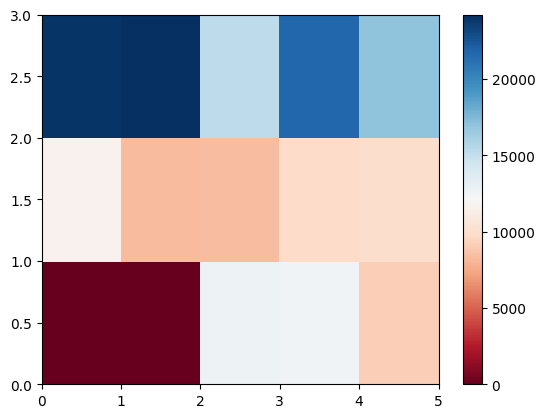

In [60]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drivewheel' and 'carbody' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drivewheel' and 'carbody'.

The default labels convey no useful information to us. Let's change that:


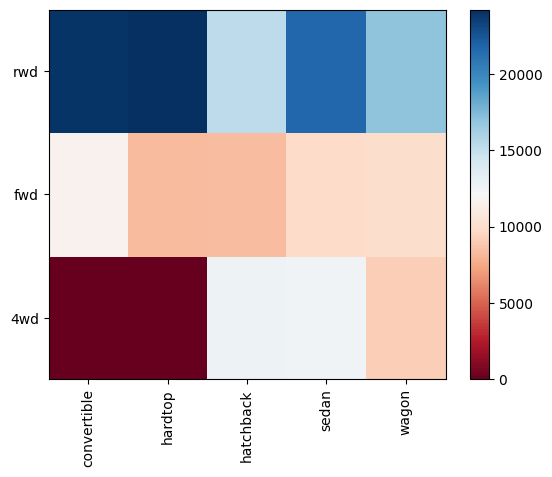

In [61]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

Visualization is very important in data science, and Python visualization packages provide great freedom.

The main question we want to answer is, "What are the main characteristics which have the most impact on the car price?".

To get a better measure of the important characteristics, we look at the correlation of these variables with the car price. In other words: how is the car price dependent on this variable?


## **5. Correlation and Causation**

**Correlation**: a measure of the extent of interdependence between variables.

**Causation**: the relationship between cause and effect between two variables.

It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler than determining causation as causation may require independent experimentation.


<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>


In [ ]:
df.corr()

Sometimes we would like to know the significant of the correlation estimate.


**P-value**

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the
* p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.
* the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.
* the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.
* the p-value is $>$ 0.1: there is no evidence that the correlation is significant.


 We can obtain this information using  "stats" module in the "scipy"  library.


In [62]:
from scipy import stats

### Wheel Base vs. Price


Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheelbase' and 'price'.


In [63]:
pearson_coef, p_value = stats.pearsonr(df['wheelbase'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5778155982921502  with a P-value of P = 1.1828204863376968e-19


#### Conclusion:
Since the p-value is $<$ 0.001, the correlation between wheelbase and price is statistically significant, although the linear relationship isn't extremely strong (~0.578).


### Horsepower vs. Price


 Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.


In [64]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8081388225362217  with a P-value of P =  1.4834365732939254e-48


#### Conclusion:

Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.808, close to 1).


### Carlength vs. Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'carlength' and 'price'.


In [65]:
pearson_coef, p_value = stats.pearsonr(df['carlength'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.6829200156779621  with a P-value of P =  1.678706624074565e-29


#### Conclusion:
Since the p-value is $<$ 0.001, the correlation between carlength and price is statistically significant, and the linear relationship is moderately strong (~0.683).


### Carwidth vs. Price


Let's calculate the Pearson Correlation Coefficient and P-value of 'carwidth' and 'price':


In [66]:
pearson_coef, p_value = stats.pearsonr(df['carwidth'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

The Pearson Correlation Coefficient is 0.7593252997415118  with a P-value of P = 9.62743787611891e-40


#### Conclusion:

Since the p-value is < 0.001, the correlation between carwidth and price is statistically significant, and the linear relationship is quite strong (~0.759).


### Curb Weight vs. Price


Let's calculate the Pearson Correlation Coefficient and P-value of 'curbweight' and 'price':


In [67]:
pearson_coef, p_value = stats.pearsonr(df['curbweight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8353048793372968  with a P-value of P =  1.2144448264030392e-54


#### Conclusion:
Since the p-value is $<$ 0.001, the correlation between curbweight and price is statistically significant, and the linear relationship is quite strong (~0.835).


### Engine Size vs. Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'enginesize' and 'price':


In [68]:
pearson_coef, p_value = stats.pearsonr(df['enginesize'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.874144802524512  with a P-value of P = 1.3547637598644455e-65


#### Conclusion:

Since the p-value is $<$ 0.001, the correlation between enginesize and price is statistically significant, and the linear relationship is very strong (~0.874).


### Boreratio vs. Price


Let's calculate the  Pearson Correlation Coefficient and P-value of 'boreratio' and 'price':


In [69]:
pearson_coef, p_value = stats.pearsonr(df['boreratio'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value )

The Pearson Correlation Coefficient is 0.5531732367984437  with a P-value of P =   7.907922278248905e-18


#### Conclusion:
Since the p-value is $<$ 0.001, the correlation between boreratio and price is statistically significant, but the linear relationship is only moderate (~0.553).


We can relate the process for each 'citympg'  and 'highwaympg':


### City mpg vs. Price


In [70]:
pearson_coef, p_value = stats.pearsonr(df['citympg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.68575133602704  with a P-value of P =  7.978684249662947e-30


#### Conclusion:
Since the p-value is $<$ 0.001, the correlation between citympg and price is statistically significant, and the coefficient of about -0.686 shows that the relationship is negative and moderately strong.


### Highway mpg vs. Price


In [71]:
pearson_coef, p_value = stats.pearsonr(df['highwaympg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value )

The Pearson Correlation Coefficient is -0.6975990916465564  with a P-value of P =  3.230681380364487e-31


#### Conclusion:
Since the p-value is < 0.001, the correlation between highway mpg and price is statistically significant, and the coefficient of about -0.698 shows that the relationship is negative and moderately strong.


#### Conclusion: Important Variables


We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:
* carlength
* carwidth
* curbweight
* enginesize
* horsepower
* citympg
* highwaympg
* wheelbase
* boreratio

    
Categorical variables:
* drivewheel

For the following workshop we will focus on building machine learning models to automate our analysis, feeding the model variables that meaningfull will improve our model's prediction performance.
